In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import exposure
from skimage.exposure import match_histograms

In [2]:
# TODO
# auto contrast
# histogram equalization
# histrogram specification
# discuss what happen

In [3]:
img = cv2.imread('penguin.png')

In [4]:
def auto_contrast(img):
    img_min, img_max = np.percentile(img, [25, 75])
    low = np.min(img)
    high = np.max(img)
    new_img = (img - img_min) * ((high - low) / (img_max - img_min)) + low
    new_img = new_img.astype(np.uint8)
    return new_img

def histogram_equalization(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    new_img = cdf[img]
    return new_img

def histogram_specification(img, ref):
    matched = match_histograms(img, ref)
    matched = matched.astype(np.uint8)
    return matched

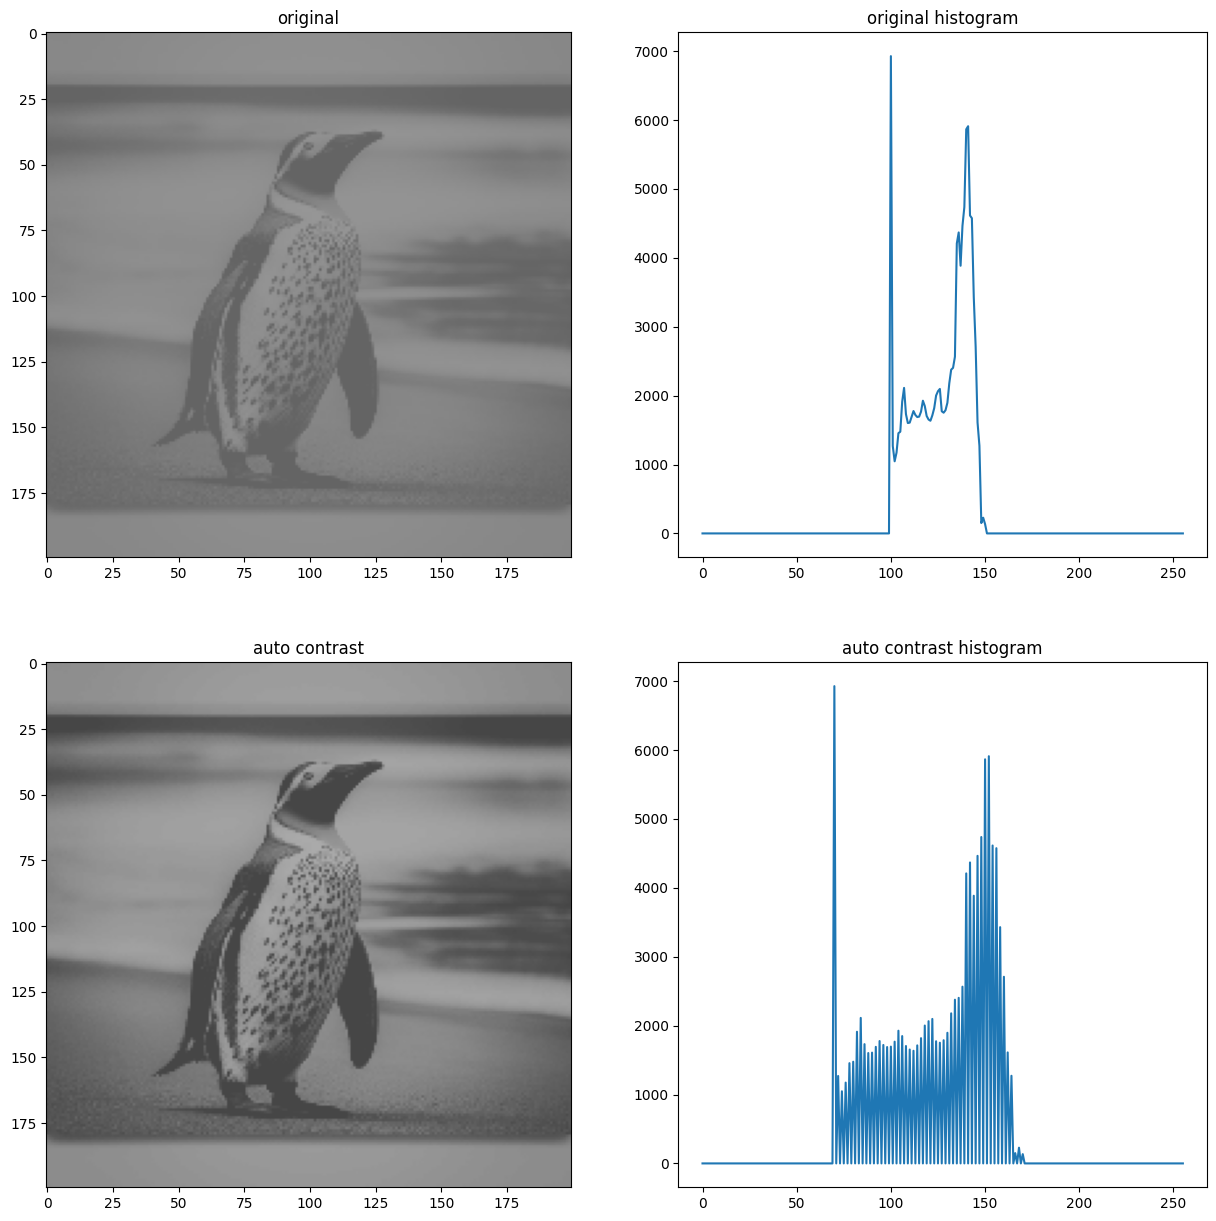

In [5]:
img = cv2.imread('penguin.png')
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
new_img = auto_contrast(img)
new_hist, bins = np.histogram(new_img.flatten(), 256, [0, 256])
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].imshow(img)
axs[0, 0].set_title('original')
axs[1, 0].imshow(new_img)
axs[1, 0].set_title('auto contrast')
axs[0, 1].plot(hist)
axs[0, 1].set_title('original histogram')
axs[1, 1].plot(new_hist)
axs[1, 1].set_title('auto contrast histogram')
plt.show()


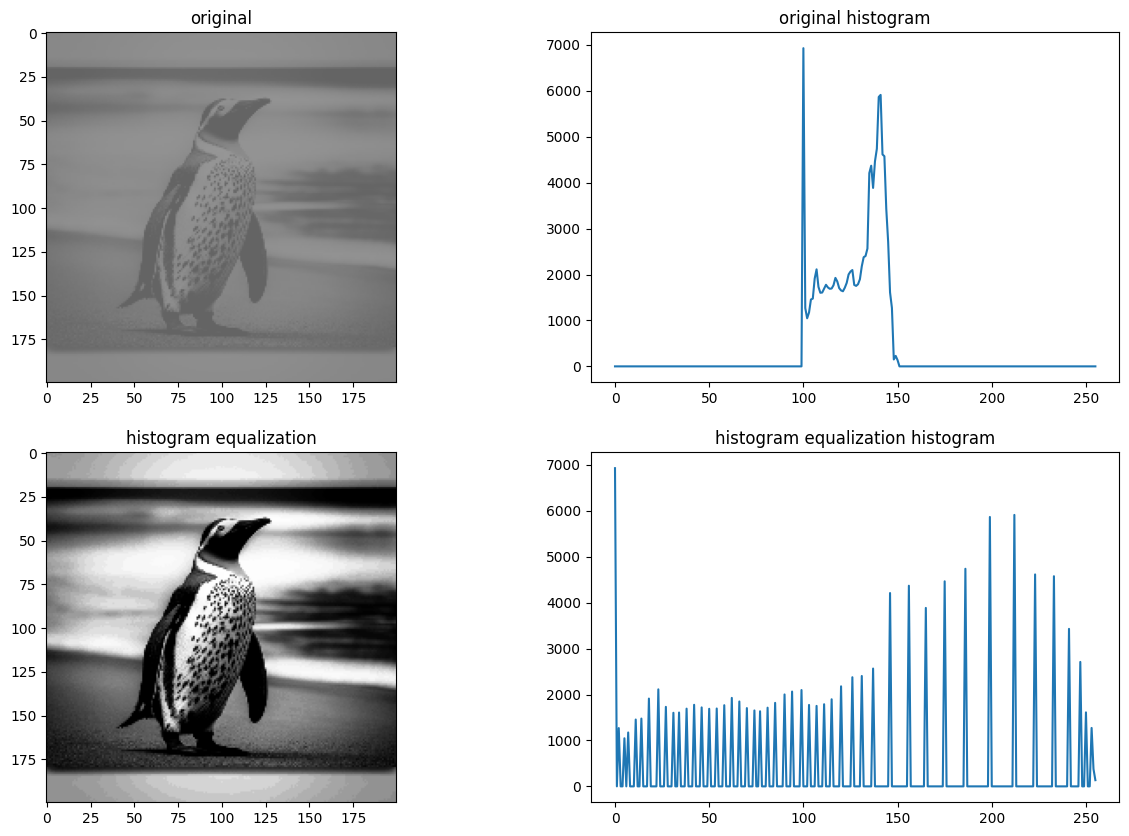

In [6]:
img = cv2.imread('penguin.png')
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
new_img = histogram_equalization(img)
new_hist, bins = np.histogram(new_img.flatten(), 256, [0, 256])
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].imshow(img)
axs[0, 0].set_title('original')
axs[1, 0].imshow(new_img)
axs[1, 0].set_title('histogram equalization')
axs[0, 1].plot(hist)
axs[0, 1].set_title('original histogram')
axs[1, 1].plot(new_hist)
axs[1, 1].set_title('histogram equalization histogram')
plt.show()

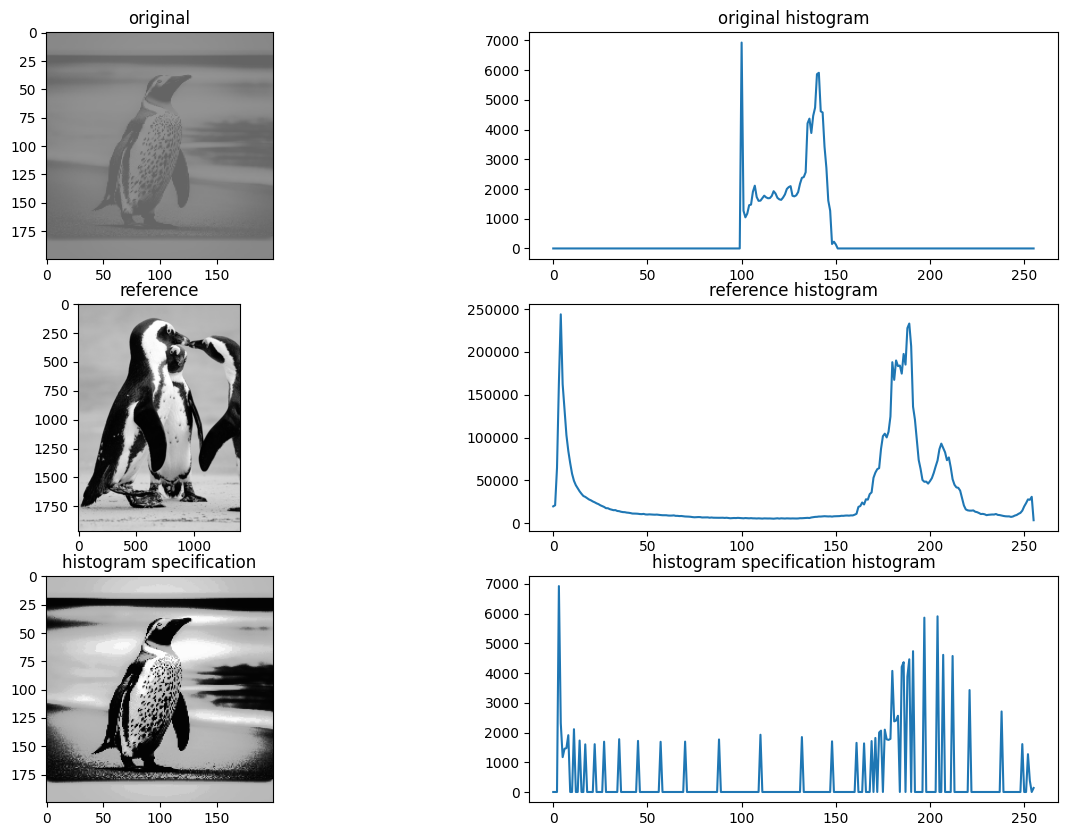

In [7]:
img = cv2.imread('penguin.png')
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
ref = cv2.imread('penguin2.jpeg')
ref_hist, bins = np.histogram(ref.flatten(), 256, [0, 256])
new_img = histogram_specification(img, ref)
new_hist, bins = np.histogram(new_img.flatten(), 256, [0, 256])
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
axs[0, 0].imshow(img)
axs[0, 0].set_title('original')
axs[1, 0].imshow(ref)
axs[1, 0].set_title('reference')
axs[2, 0].imshow(new_img)
axs[2, 0].set_title('histogram specification')
axs[0, 1].plot(hist)
axs[0, 1].set_title('original histogram')
axs[1, 1].plot(ref_hist)
axs[1, 1].set_title('reference histogram')
axs[2, 1].plot(new_hist)
axs[2, 1].set_title('histogram specification histogram')
plt.show()

# disscussion

Auto-contrast, histogram equalization, and histogram specification are three different image processing techniques used to manipulate the contrast and overall appearance of an image. Let's delve into each of these techniques and their effects on a penguin photo:

Auto-Contrast:

Auto-contrast is a basic image enhancement technique that adjusts the contrast of an image automatically without user input.
It stretches the pixel values across the entire available range, making the darkest parts of the image even darker and the brightest parts even brighter.
In the context of a penguin photo, auto-contrast would make the differences between the light and dark areas more pronounced. This can enhance the overall contrast of the penguin but might not reveal much additional detail.
Histogram Equalization:

Histogram equalization is a more advanced technique that redistributes the intensity values of an image to achieve a uniform distribution in the histogram.
It can enhance the details in an image by making the most of the available dynamic range, potentially bringing out hidden features.
Applying histogram equalization to a penguin photo would make it look more evenly exposed and reveal more fine-grained details in the feathers and surroundings.
Histogram Specification:

Histogram specification is a technique where you modify the histogram of an image to match a predefined reference histogram.
In the context of the penguin photo, you would specify a reference photo with a desired histogram.
When you apply histogram specification, it enhances the contrast of the penguin image while also making it resemble the reference photo in terms of contrast distribution. This means the penguin's contrast properties become dependent on the reference photo.
In summary, while auto-contrast simply enhances the overall contrast of the penguin photo, histogram equalization goes a step further by revealing more details throughout the image. Histogram specification takes it a step further by not only enhancing contrast but also making the penguin's contrast properties conform to those of a reference photo. The choice of which technique to use depends on the desired outcome and the specific characteristics you want to emphasize in the penguin image.